In [40]:
import sounddevice as sd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq
from scipy.fftpack import rfft, rfftfreq

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = [16, 5]

In [2]:
def str2bits(str):
    res = bin(int.from_bytes(str.encode('ascii'), 'big'))[2:]
    return '0'*(8 - (len(res) % 8)) + res

In [3]:
from pam import SoundCommunication

In [71]:
msg = """
[ 7071.657145] CPU3: Core temperature above threshold, cpu clock throttled (total events = 88)
[ 7071.657156] CPU2: Core temperature above threshold, cpu cloc
"""
r = msg.encode('ascii')

In [58]:
with open('file.txt', 'rb') as f:
    msg = f.read()

In [60]:
r = msg
comm1 = SoundCommunication(44100, 50, 1000, 2000)
comm2 = SoundCommunication(44100, 50, 2000, 3000)

from testing import Tester
t = Tester(comm1)
S = np.hstack((comm1.send(r), comm2.send(r)))

In [ ]:
# assert comm.decode(t.pad(S))[:len(r)]

In [ ]:
# _, W = wav.read('w.wav')

In [ ]:
# wav.write('w.wav', data=W, rate=comm.FS)

In [9]:
#transmission
# sd.play(t.pad(S), samplerate=comm.FS)

In [65]:
#recording
W = sd.rec(int(65 * comm1.FS), channels=1, samplerate=comm1.FS, blocking=True).ravel()

In [72]:
freqs = fftfreq(W.size, 1/comm1.FS)
mask1 = np.logical_and(freqs > 1000, freqs < 2000)
mask2 = np.logical_and(freqs > 2000, freqs < 3000)
fW = fft(W)
E1 = np.sum(fW[mask1]*fW[mask1].conj())
E2 = np.sum(fW[mask2]*fW[mask2].conj())
if E1 < E2:
    wr = comm1.decode(W)
else:
    wr = comm2.decode(W[S.size//2:])
t.diff(wr[:len(r)], r)


('00001010010110110010000000110111001100000011011100110001001011100011011000110101001101110011000100110100001101010101110100100000010000110101000001010101001100110011101000100000010000110110111101110010011001010010000001110100011001010110110101110000011001010111001001100001011101000111010101110010011001010010000001100001011000100110111101110110011001010010000001110100011010000111001001100101011100110110100001101111011011000110010000101100001000000110001101110000011101010010000001100011011011000110111101100011011010110010000001110100011010000111001001101111011101000111010001101100011001010110010000100000001010000111010001101111011101000110000101101100001000000110010101110110011001010110111001110100011100110010000000111101001000000011100000111000001010010000101001011011001000000011011100110000001101110011000100101110001101100011010100110111001100010011010100110110010111010010000001000011010100000101010100110010001110100010000001000011011011110111001001100101001000000111010001100101011011

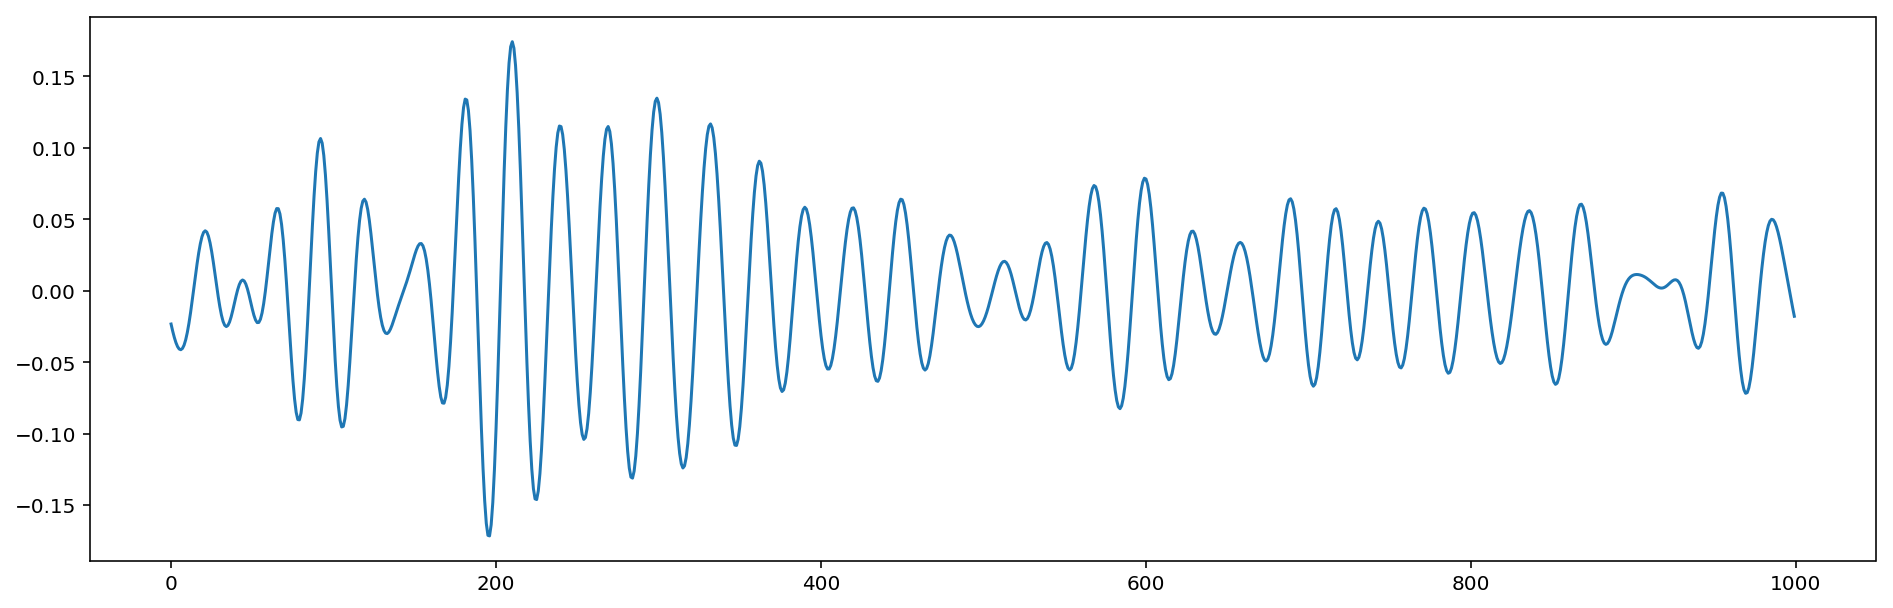

In [63]:
plt.plot(comm1.bandpass_filter(W[80000:81000], 1000, 2000))

In [68]:
print(wr.decode('ascii'))


[ 7071.657145] CPU3: Core temperature above threshold, cpu clock throttled (total events = 88)
[ 7071.657156] CPU2: Core temperature above threshold, cpu cloc
@                   
